In [1]:
import numpy as np
import math
import scipy as sci
import matplotlib.pyplot as plt

In [2]:
c0 = np.array([8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
c1 = np.array([3.141853320742374, 3.141634186673505, 3.141598567141290, 3.141593444476827, 3.141592755917011, 
      3.141592666605240, 3.141592655231017, 3.141592653795842, 3.141592653615609, 3.141592653593017])
c2 = np.array([3.141602881806524, 3.141593478636688, 3.141592712667618, 3.141592657551323, 3.141592653846416, 
      3.141592653606128, 3.141592653590817, 3.141592653589862, 3.141592653589790])
actual = 3.141592653589790

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


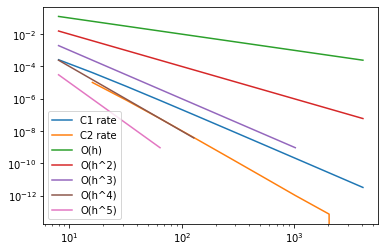

In [3]:
plt.loglog(c0,abs(c1-actual),label="C1 rate")
plt.loglog(c0[1:10],abs(c2-actual),label="C2 rate")
plt.loglog(c0,1/c0,label="O(h)")
plt.loglog(c0,1/c0**2,label="O(h^2)")
plt.loglog(c0,1/c0**3,label="O(h^3)")
plt.loglog(c0,1/c0**4,label="O(h^4)")
plt.loglog(c0,1/c0**5,label="O(h^5)")
plt.legend()

In [4]:
n3h = c2[1]+(c2[1]-c2[0])/15
print(n3h)
c3 = []
for i in range(len(c2)-1):
    c3.append(c2[i+1]+(c2[i+1]-c2[i])/15)
c3

3.141592851758699


[3.141592851758699,
 3.1415926616030134,
 3.141592653876903,
 3.141592653599422,
 3.141592653590109,
 3.1415926535897967,
 3.1415926535897984,
 3.141592653589785]

In [5]:
def Euler(f,a,b,n,alpha):
    h = (b-a)/n
    t = [a]
    w = [alpha]
    for i in range(1,n+1):
        t.append(t[i-1]+h)
        w.append(w[i-1]+h*f(t[i-1],w[i-1]))
    return (t,w)
    

In [7]:
f = lambda t,y : 10*y**2
t,w = Euler(f,0,1,4,0.1)
from tabulate import tabulate
print(tabulate([[t[0], w[0]], [t[1], w[1]], [t[2], w[2]], [t[3], w[3]],[t[4], w[4]]], headers=['ti', 'wi']))

  ti        wi
----  --------
0     0.1
0.25  0.125
0.5   0.164062
0.75  0.231354
1     0.365165
